___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


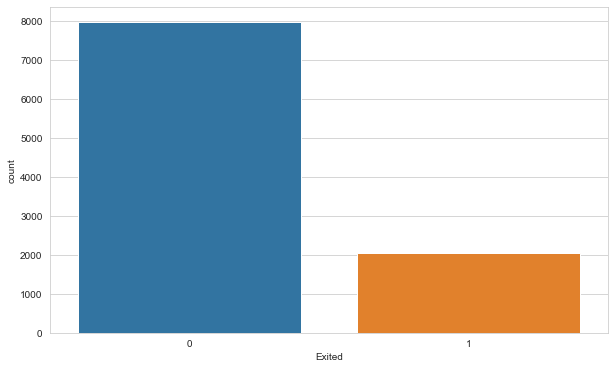

In [7]:
sns.countplot(data["Exited"]);

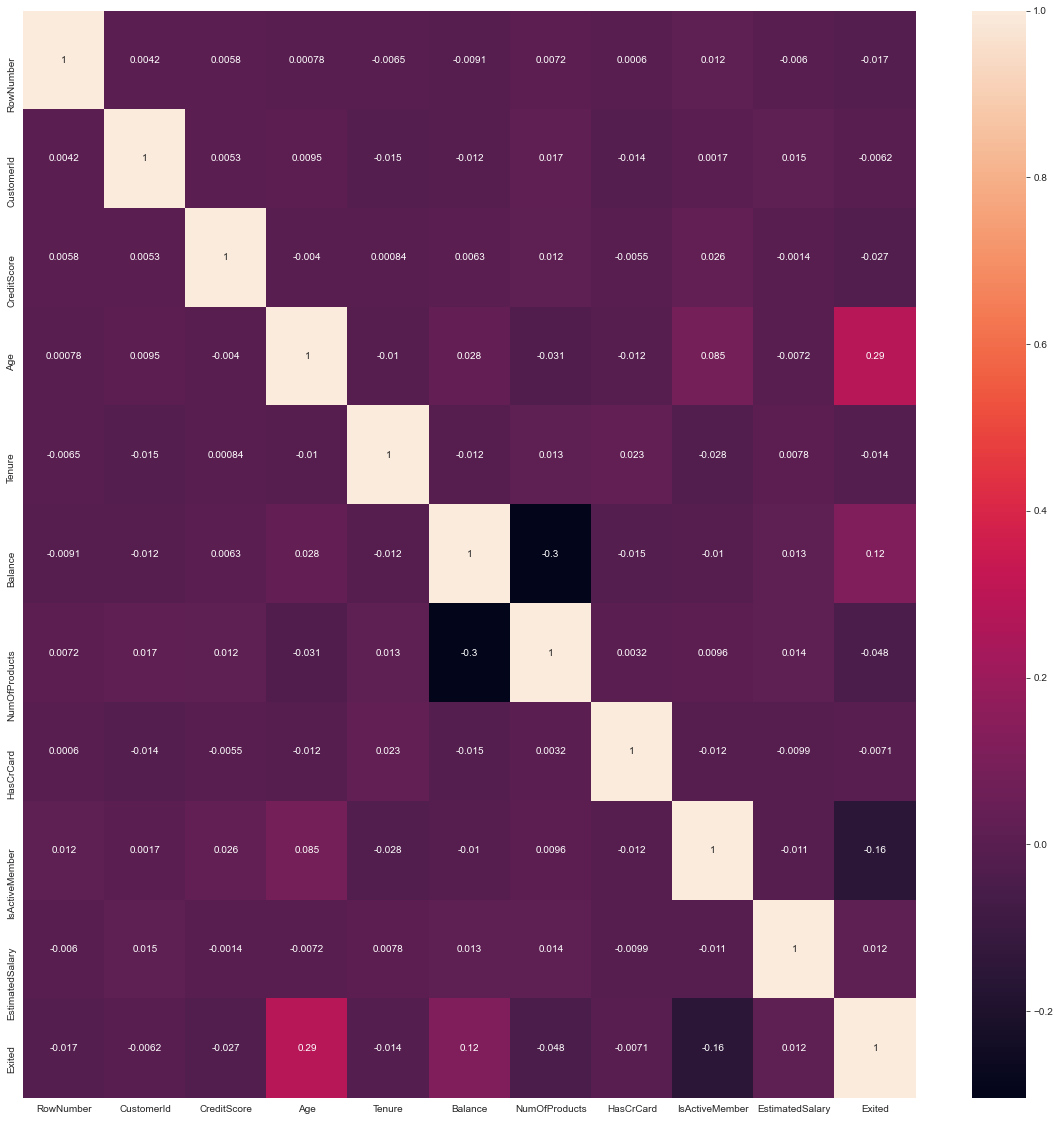

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True);

In [9]:
#  # We first review the 'Status' relation with categorical variables
# fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

# ax = sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0], palette="coolwarm_r")
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

# ax = sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1],palette="coolwarm_r")
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

# ax = sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0],palette="coolwarm_r")
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

# ax = sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1],palette="coolwarm_r")
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
drop_list = ['RowNumber', 'CustomerId', 'Surname']
data = data.drop(drop_list, axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [12]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Geography'] = label.fit_transform(data['Geography'])
data['Gender'] = label.fit_transform(data['Gender'])

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000,1,1,1,101348.880,1
1,608,2,0,41,1,83807.860,1,0,1,112542.580,0
2,502,0,0,42,8,159660.800,3,1,0,113931.570,1
3,699,0,0,39,1,0.000,2,0,0,93826.630,0
4,850,2,0,43,2,125510.820,1,1,1,79084.100,0


In [16]:
data.shape

(10000, 11)

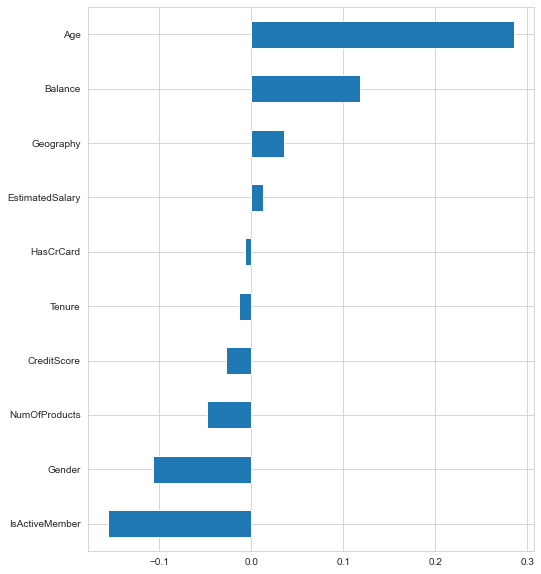

In [17]:
plt.figure(figsize = (8,10))
data.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

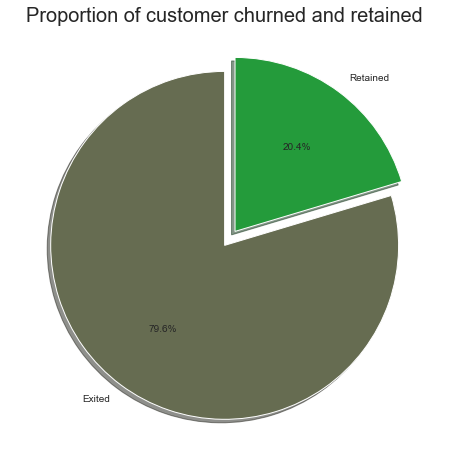

In [18]:
import random
n = 40
color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(n)]
labels = 'Exited', 'Retained'
plt.figure(figsize=(10,8))
explode = [0,0.1]
plt.title("Proportion of customer churned and retained", size = 20)
plt.pie(data['Exited'].value_counts(), labels=labels,explode=explode,autopct='%1.1f%%', colors=color,shadow=True,startangle=90);

## Preprocessing of Data
- Train | Test Split, Scalling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
X = data.drop('Exited', axis=1)
y = data['Exited'].values

In [21]:
seed = 42
test_size = 0.20

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = test_size, random_state = seed)

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [85]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

In [86]:
tf.__version__

'2.8.0'

In [87]:
X_train.shape

(8000, 10)

In [88]:
X_test.shape

(2000, 10)

### Creating Model

### without class_weigth

In [89]:
tf.random.set_seed(seed) # it should be with the weights cell

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [90]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [111]:
history = model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1, callbacks=[early_stop])
# Validation_split takes last 10% of the data. It's just for validating our model work.
# But in the validation data, you're separating a untouched data for validating.
# validation_data = (X_test, y_test) 

Epoch 1/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4747 - accuracy: 0.7979 - val_loss: 0.4383 - val_accuracy: 0.8138
Epoch 2/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8086 - val_loss: 0.3911 - val_accuracy: 0.8413
Epoch 3/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8321 - val_loss: 0.3490 - val_accuracy: 0.8550
Epoch 4/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8453 - val_loss: 0.3406 - val_accuracy: 0.8612
Epoch 5/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8496 - val_loss: 0.3360 - val_accuracy: 0.8650
Epoch 6/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8486 - val_loss: 0.3387 - val_accuracy: 0.8662
Epoch 7/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8550 - val_loss: 0.3224 - val_accuracy:

#### Evaluate

In [112]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8400


[0.3763584792613983, 0.8399999737739563]

In [113]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                330       
                                                                 
 dense_25 (Dense)            (None, 15)                465       
                                                                 
 dense_26 (Dense)            (None, 1)                 16        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

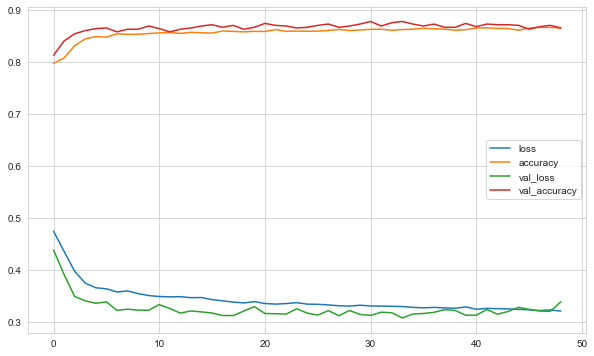

In [114]:
loss_df = pd.DataFrame(history.history)
loss_df.plot()

In [115]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3763584792613983
accuracy :  0.8399999737739563


In [116]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1432  161]
 [ 159  248]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [117]:
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

In [118]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes= np.unique(y_train),
                                                 y = y_train)

In [119]:
class_weights

array([0.62794349, 2.45398773])

In [120]:
""" class_weight: Optional dictionary mapping class indices (integers)
        to a weight (float) value, used for weighting the loss function
        (during training only).
        This can be useful to tell the model to
        "pay more attention" to samples from
        an under-represented class."""


# define sequential model

model_weighted = Sequential()
model_weighted.add(Dense(15, input_shape=(10,), activation='relu'))
model_weighted.add(Dense(10, activation='relu'))
model_weighted.add(Dense(5,  activation = 'relu'))
model_weighted.add(Dense(1, activation='sigmoid')) # we use sigmoid for binary output
model_weighted.summary()


# compile the model

opt = Adam(lr = 0.005)
model_weighted.compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

# now we fit our model to training data

class_weight = {0: 0.62794349, 1:2.45398773}

history = model_weighted.fit(X_train, y_train, epochs=250, 
                    validation_split = 0.2,
                    batch_size=64,  
                    callbacks = [early_stop],
                    class_weight=class_weight)
                    

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 15)                165       
                                                                 
 dense_32 (Dense)            (None, 10)                160       
                                                                 
 dense_33 (Dense)            (None, 5)                 55        
                                                                 
 dense_34 (Dense)            (None, 1)                 6         
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
100/100 [==============================] - 1s 2ms/step - loss: 0.6820 - accuracy: 0.3766 - val_loss: 0.6944 - val_accuracy: 0.6237
Epoch 2/250
100/100 [=======================

#### Evaluate

<AxesSubplot:>

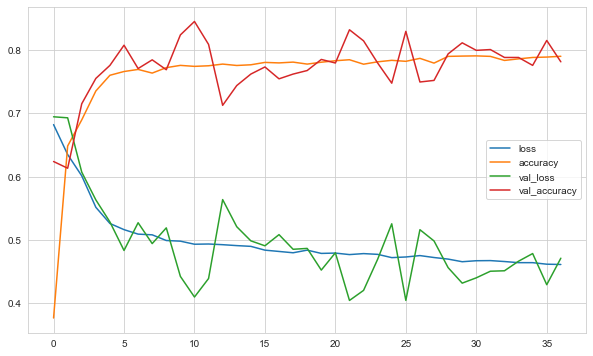

In [121]:
loss_df = pd.DataFrame(history.history)
loss_df.plot()

In [122]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3764 - accuracy: 0.8400


[0.3763584792613983, 0.8399999737739563]

In [123]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3763584792613983
accuracy :  0.8399999737739563


In [124]:
#print classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



## GridSearchCV

In [50]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [51]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [52]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [53]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
113/113 [==============================] - 1s 3ms/step - loss: 0.4847 - accuracy: 0.7951 - val_loss: 0.4446 - val_accuracy: 0.8112
Epoch 2/200
113/113 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.8064 - val_loss: 0.4045 - val_accuracy: 0.8275
Epoch 3/200
113/113 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8254 - val_loss: 0.3604 - val_accuracy: 0.8500
Epoch 4/200
113/113 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8467 - val_loss: 0.3452 - val_accuracy: 0.8612
Epoch 5/200
113/113 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.8503 - val_loss: 0.3424 - val_accuracy: 0.8637
Epoch 6/200
113/113 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8499 - val_loss: 0.3243 - val_accuracy: 0.8650
Epoch 7/200
113/113 [==============================] - 0s 3ms/step - loss: 0.35

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc34ecaef40>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

#### Evaluate

In [54]:
grid_model.best_score_

0.858375

In [55]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [56]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values("rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
20,0.858,0.015,1,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
11,0.857,0.014,2,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
17,0.857,0.022,3,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
8,0.856,0.012,4,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
5,0.856,0.013,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,0.856,0.015,6,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
3,0.856,0.012,7,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
0,0.856,0.013,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
19,0.855,0.014,9,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
12,0.854,0.014,10,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."


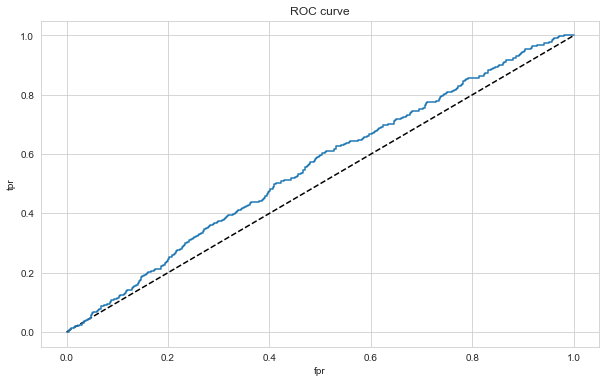

In [57]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## Final Model and Model Deployment

In [58]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [59]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
#optimizer will be changed.

In [60]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [61]:
#validation_split and validation_data is different. 
# if you write them together, validation_data will be used.  
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
125/125 [==============================] - 1s 7ms/step - loss: 0.4964 - accuracy: 0.7962 - val_loss: 0.4705 - val_accuracy: 0.7965
Epoch 2/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7983 - val_loss: 0.4556 - val_accuracy: 0.8000
Epoch 3/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8040 - val_loss: 0.4452 - val_accuracy: 0.8100
Epoch 4/1000
125/125 [==============================] - 1s 4ms/step - loss: 0.4442 - accuracy: 0.8095 - val_loss: 0.4380 - val_accuracy: 0.8080
Epoch 5/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8089 - val_loss: 0.4288 - val_accuracy: 0.8085
Epoch 6/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8131 - val_loss: 0.4233 - val_accuracy: 0.8155
Epoch 7/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8170 - val_loss: 0.4090 - val_accuracy:

<AxesSubplot:>

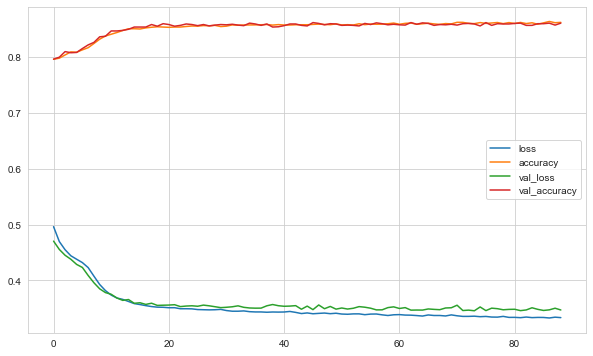

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [63]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3471357226371765
accuracy :  0.8610000014305115


In [64]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1537   56]
 [ 222  185]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [65]:
model.save('model_churn.h5')

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model_churn = load_model('model_churn.h5') # for deployment we should load our h5 file of data.
scaler_churn = pickle.load(open("scaler_churn", "rb"))

### Prediction

In [68]:
single_client = data.drop('Exited', axis = 1).iloc[0:15, :]
single_client

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.000,1,1,1,101348.880
1,608,2,0,41,1,83807.860,1,0,1,112542.580
2,502,0,0,42,8,159660.800,3,1,0,113931.570
3,699,0,0,39,1,0.000,2,0,0,93826.630
4,850,2,0,43,2,125510.820,1,1,1,79084.100
5,645,2,1,44,8,113755.780,2,1,0,149756.710
6,822,0,1,50,7,0.000,2,1,1,10062.800
7,376,1,0,29,4,115046.740,4,1,0,119346.880
8,501,0,1,44,4,142051.070,2,0,1,74940.500
9,684,0,1,27,2,134603.880,1,1,1,71725.730


In [70]:
single_client = scaler_churn.transform(single_client)
single_client

array([[0.538     , 0.        , 0.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489],
       [0.516     , 1.        , 0.        , 0.31081081, 0.1       ,
        0.35156138, 0.        , 0.        , 1.        , 0.56270874],
       [0.304     , 0.        , 0.        , 0.32432432, 0.8       ,
        0.66975307, 0.66666667, 1.        , 0.        , 0.56965435],
       [0.698     , 0.        , 0.        , 0.28378378, 0.1       ,
        0.        , 0.33333333, 0.        , 0.        , 0.46912005],
       [1.        , 1.        , 0.        , 0.33783784, 0.2       ,
        0.52649903, 0.        , 1.        , 1.        , 0.39540036],
       [0.59      , 1.        , 1.        , 0.35135135, 0.8       ,
        0.47718841, 0.33333333, 1.        , 0.        , 0.74879716],
       [0.944     , 0.        , 1.        , 0.43243243, 0.7       ,
        0.        , 0.33333333, 1.        , 1.        , 0.0502609 ],
       [0.052     , 0.5       , 0.       

In [71]:
(model_churn.predict(single_client) > 0.5).astype("int32")

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [73]:
data["Exited"].iloc[0:15]

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: Exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___